In [43]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [44]:
#Death rate data set 
data_table_path = r"\Users\rockm\Desktop\Project-1-Team-4\death_education.csv"

In [45]:
data_table = pd.read_csv(data_table_path)

# Display the first few rows of the DataFrame
data_table.head()

,Year,State,Percentage,Death Rate,Deaths
0,2000,Guam,No Data,NaN,NaN
1,2000,Virgin Islands of the U.S.,No Data,NaN,NaN
2,2000,Alabama,9.7,NaN,NaN
3,2000,Alaska,Suppressed,NaN,NaN
4,2000,Arizona,Suppressed,NaN,NaN


In [46]:
# Specify the columns to check for NaN values
columns_to_check = ['Death Rate', 'Deaths']

# Drop rows containing NaN values in the specified columns
data_table_cleaned = data_table.dropna(subset=columns_to_check)

# Display the cleaned DataFrame
print(data_table_cleaned)


      Year       State Percentage  Death Rate  Deaths
271   2005     Alabama       11.3        29.8  1429.0
272   2005      Alaska        4.3        22.4    93.0
273   2005     Arizona       11.1        20.4  1208.0
274   2005    Arkansas       10.9        27.1   824.0
275   2005  California       11.3        23.8  7697.0
...    ...         ...        ...         ...     ...
1179  2021     Vermont         13        17.9   158.0
1180  2021    Virginia         18        25.8  2667.0
1181  2021  Washington       12.4        24.8  2237.0
1183  2021   Wisconsin       10.8        22.6  1686.0
1184  2021     Wyoming        8.9        23.9   172.0

[439 rows x 5 columns]


In [47]:
import pandas as pd

# Assuming 'data_table' is your DataFrame
# Filter out non-numeric values in the 'Year' column
data_table['Year'] = data_table['Year'][data_table['Year'].str.isnumeric()]

# Convert 'Year' column to datetime format
data_table['Year'] = pd.to_datetime(data_table['Year'], errors='coerce', format='%Y')

# Drop rows with missing or invalid datetime values
data_table = data_table.dropna(subset=['Year'])

# Filter data starting from the year 2012
filtered_data = data_table[data_table['Year'].dt.year >= 2012]

# Display the filtered data
print(filtered_data)


           Year                       State  Percentage  Death Rate  Deaths
648  2012-01-01  Virgin Islands of the U.S.     No Data         NaN     NaN
649  2012-01-01                     Alabama        12.8         NaN     NaN
650  2012-01-01                      Alaska         8.4         NaN     NaN
651  2012-01-01                     Arizona          15         NaN     NaN
652  2012-01-01                    Arkansas        11.1         NaN     NaN
...         ...                         ...         ...         ...     ...
1183 2021-01-01                   Wisconsin        10.8        22.6  1686.0
1184 2021-01-01                     Wyoming         8.9        23.9   172.0
1185 2021-01-01                        Guam  Suppressed         NaN     NaN
1186 2021-01-01                 Puerto Rico          17         NaN     NaN
1187 2021-01-01  Virgin Islands of the U.S.  Suppressed         NaN     NaN

[540 rows x 5 columns]


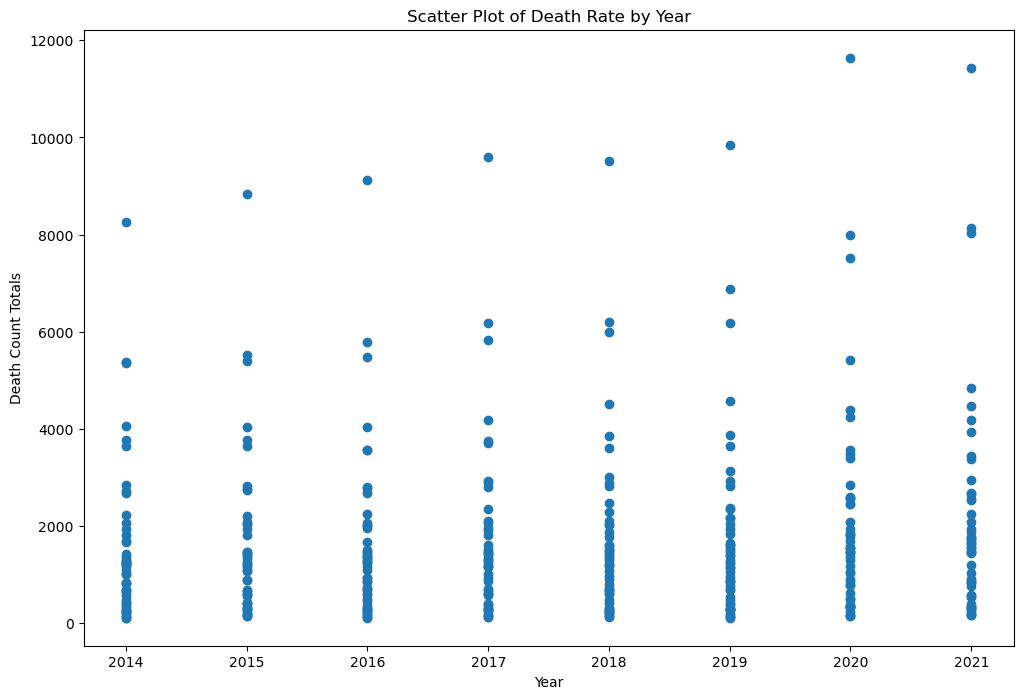

In [48]:
import matplotlib.pyplot as plt
import pandas as pd

data_table['Year'] = pd.to_datetime(data_table['Year'], format='%Y')

# Filter data starting from the year 2012
filtered_data = data_table[data_table['Year'].dt.year >= 2012]

# Scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(filtered_data['Year'], filtered_data['Deaths'])
plt.title('Scatter Plot of Death Rate by Year')
plt.xlabel('Year')
plt.ylabel('Death Count Totals')
plt.show()

C:\Users\rockm\AppData\Local\Temp\ipykernel_24712\1766005514.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Death Rate'] /= 1000


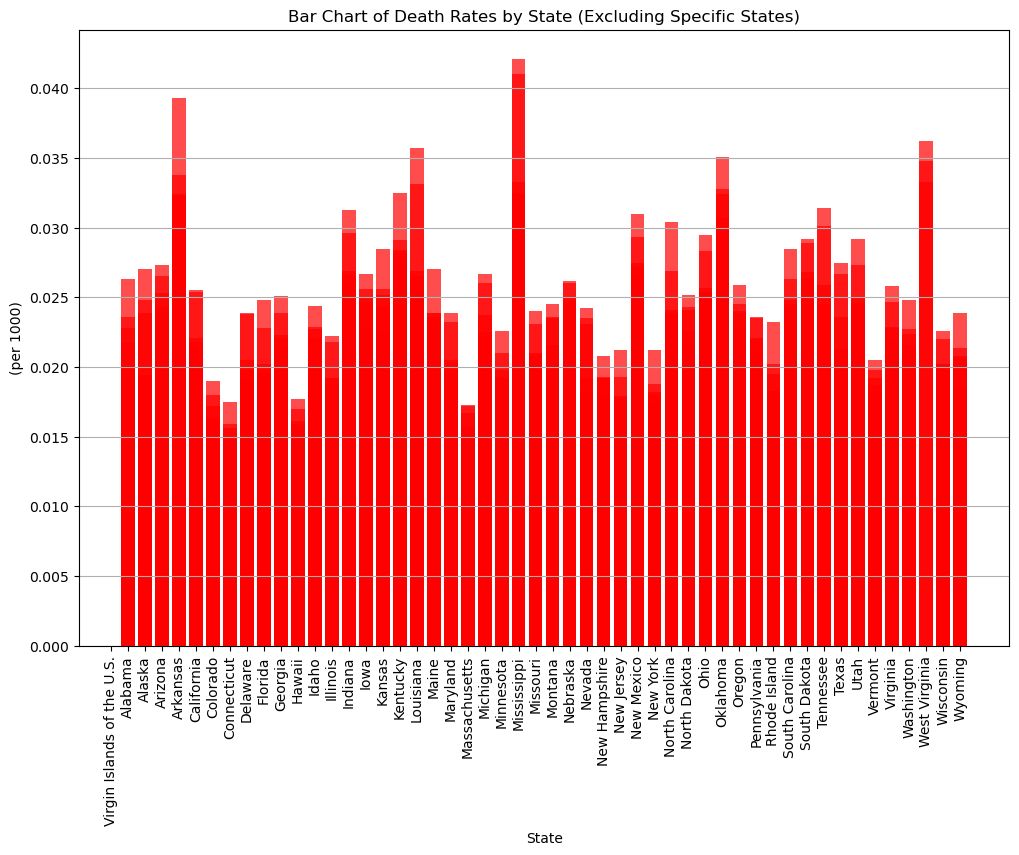

In [49]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data_table' is your DataFrame
# Convert 'YEAR' column to datetime format
data_table['Year'] = pd.to_datetime(data_table['Year'], format='%Y')

# Filter data starting from the year 2012 and excluding specific states
excluded_states = ['Virgin Islands', 'District of Columbia', 'Guam', 'Puerto Rico']
filtered_data = data_table[(data_table['Year'].dt.year >= 2012) & ~data_table['State'].isin(excluded_states)]

# Divide 'Death Rate' by 1000
filtered_data['Death Rate'] /= 1000

# Bar chart with vertical state ticks
plt.figure(figsize=(12, 8))
bars = plt.bar(filtered_data['State'], filtered_data['Death Rate'], color='red', alpha=0.7)

plt.title('Bar Chart of Death Rates by State (Excluding Specific States)')
plt.xlabel('State')
plt.ylabel('(per 1000)')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90, ha='center')  # Adjust the rotation angle and alignment as needed

plt.grid(axis='y')
plt.show()


